In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import multiprocessing
import numpy as np
import random as rd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import decomposition
from scipy.stats import randint
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Manipulación del dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df = df.rename(columns={
"Pregnancies": "Embarazos",
"Glucose": "Glucosa",
"BloodPressure": "PresiónArterial",
"SkinThickness": "GrosorPiel",
"BMI": "IndiceMasaCorporal",
"DiabetesPedigreeFunction": "FunciónPedigríDiabetes",
"Age": "Edad",
"Outcome": "Resultado",
"Insulin": "Insulina",
})

df

,Embarazos,Glucosa,PresiónArterial,GrosorPiel,Insulina,IndiceMasaCorporal,FunciónPedigríDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Embarazos,Glucosa,PresiónArterial,GrosorPiel,Insulina,IndiceMasaCorporal,FunciónPedigríDiabetes,Edad,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int64  
 1   Glucosa                 768 non-null    int64  
 2   PresiónArterial         768 non-null    int64  
 3   GrosorPiel              768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IndiceMasaCorporal      768 non-null    float64
 6   FunciónPedigríDiabetes  768 non-null    float64
 7   Edad                    768 non-null    int64  
 8   Resultado               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(df.shape)

(768, 9)


In [6]:
print(df.columns)

Index(['Embarazos', 'Glucosa', 'PresiónArterial', 'GrosorPiel', 'Insulina',
       'IndiceMasaCorporal', 'FunciónPedigríDiabetes', 'Edad', 'Resultado'],
      dtype='object')


In [7]:
tiposDatos=df.dtypes
print(tiposDatos)

Embarazos                   int64
Glucosa                     int64
PresiónArterial             int64
GrosorPiel                  int64
Insulina                    int64
IndiceMasaCorporal        float64
FunciónPedigríDiabetes    float64
Edad                        int64
Resultado                   int64
dtype: object


In [8]:
df.isnull().sum()

Embarazos                 0
Glucosa                   0
PresiónArterial           0
GrosorPiel                0
Insulina                  0
IndiceMasaCorporal        0
FunciónPedigríDiabetes    0
Edad                      0
Resultado                 0
dtype: int64

In [9]:
def distribucion(value):
    datos=df.columns
    df[datos[value]].hist(bins=range(0,225,5))
    plt.xlabel(datos[value])
    plt.show()

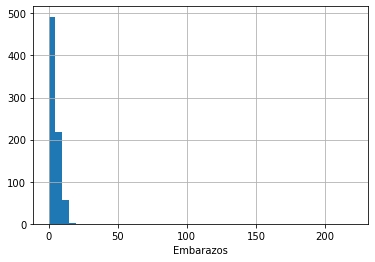

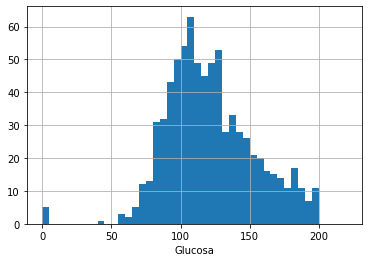

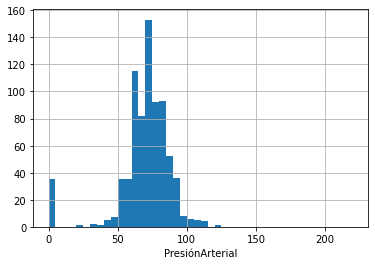

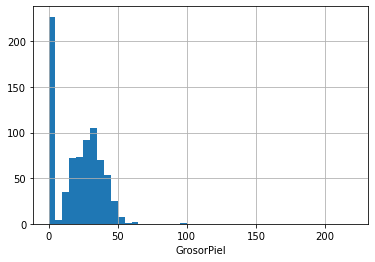

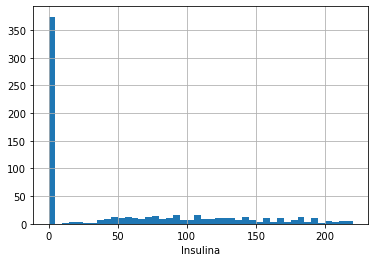

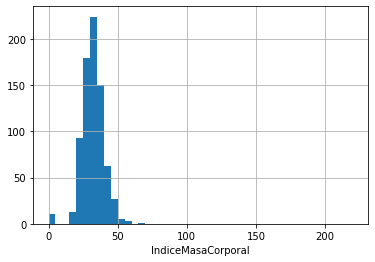

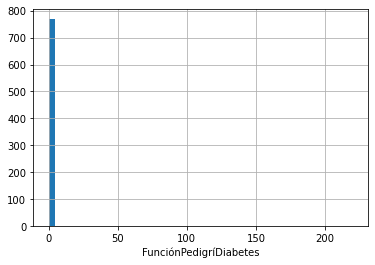

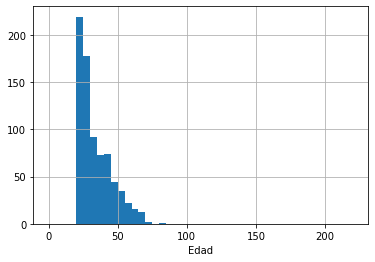

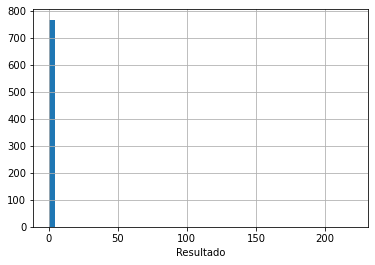

In [10]:
for i in range(tiposDatos.size):
    distribucion(i)

Text(0.5, 1.0, 'Diagrama de barras de resultado de diabetes')

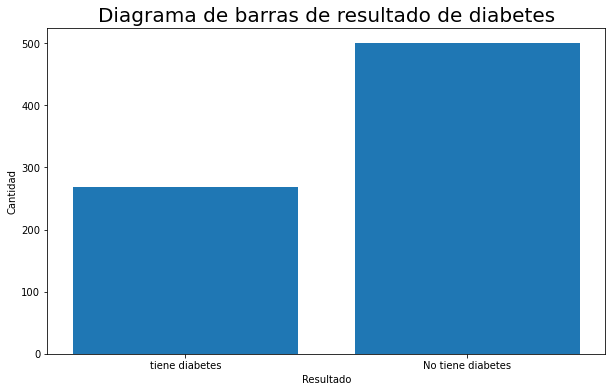

In [11]:
#distribución de las clases
plt.figure(figsize=(10,6)) 
plt.bar(["tiene diabetes", "No tiene diabetes"],[268,500])


plt.xlabel("Resultado")
plt.ylabel("Cantidad")
plt.title("Diagrama de barras de resultado de diabetes", size=20)

In [12]:
#correlacion spearman
df.corr(method="spearman")

,Embarazos,Glucosa,PresiónArterial,GrosorPiel,Insulina,IndiceMasaCorporal,FunciónPedigríDiabetes,Edad,Resultado
Embarazos,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucosa,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
PresiónArterial,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
GrosorPiel,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulina,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
IndiceMasaCorporal,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
FunciónPedigríDiabetes,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Edad,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Resultado,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


<AxesSubplot:>

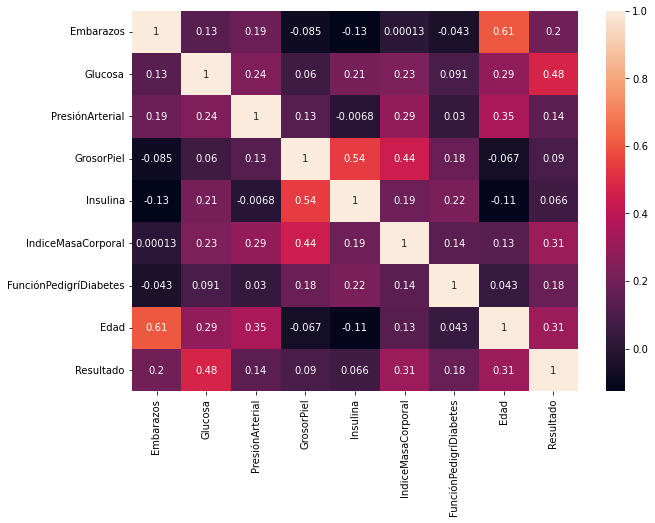

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(method="spearman"), annot=True)

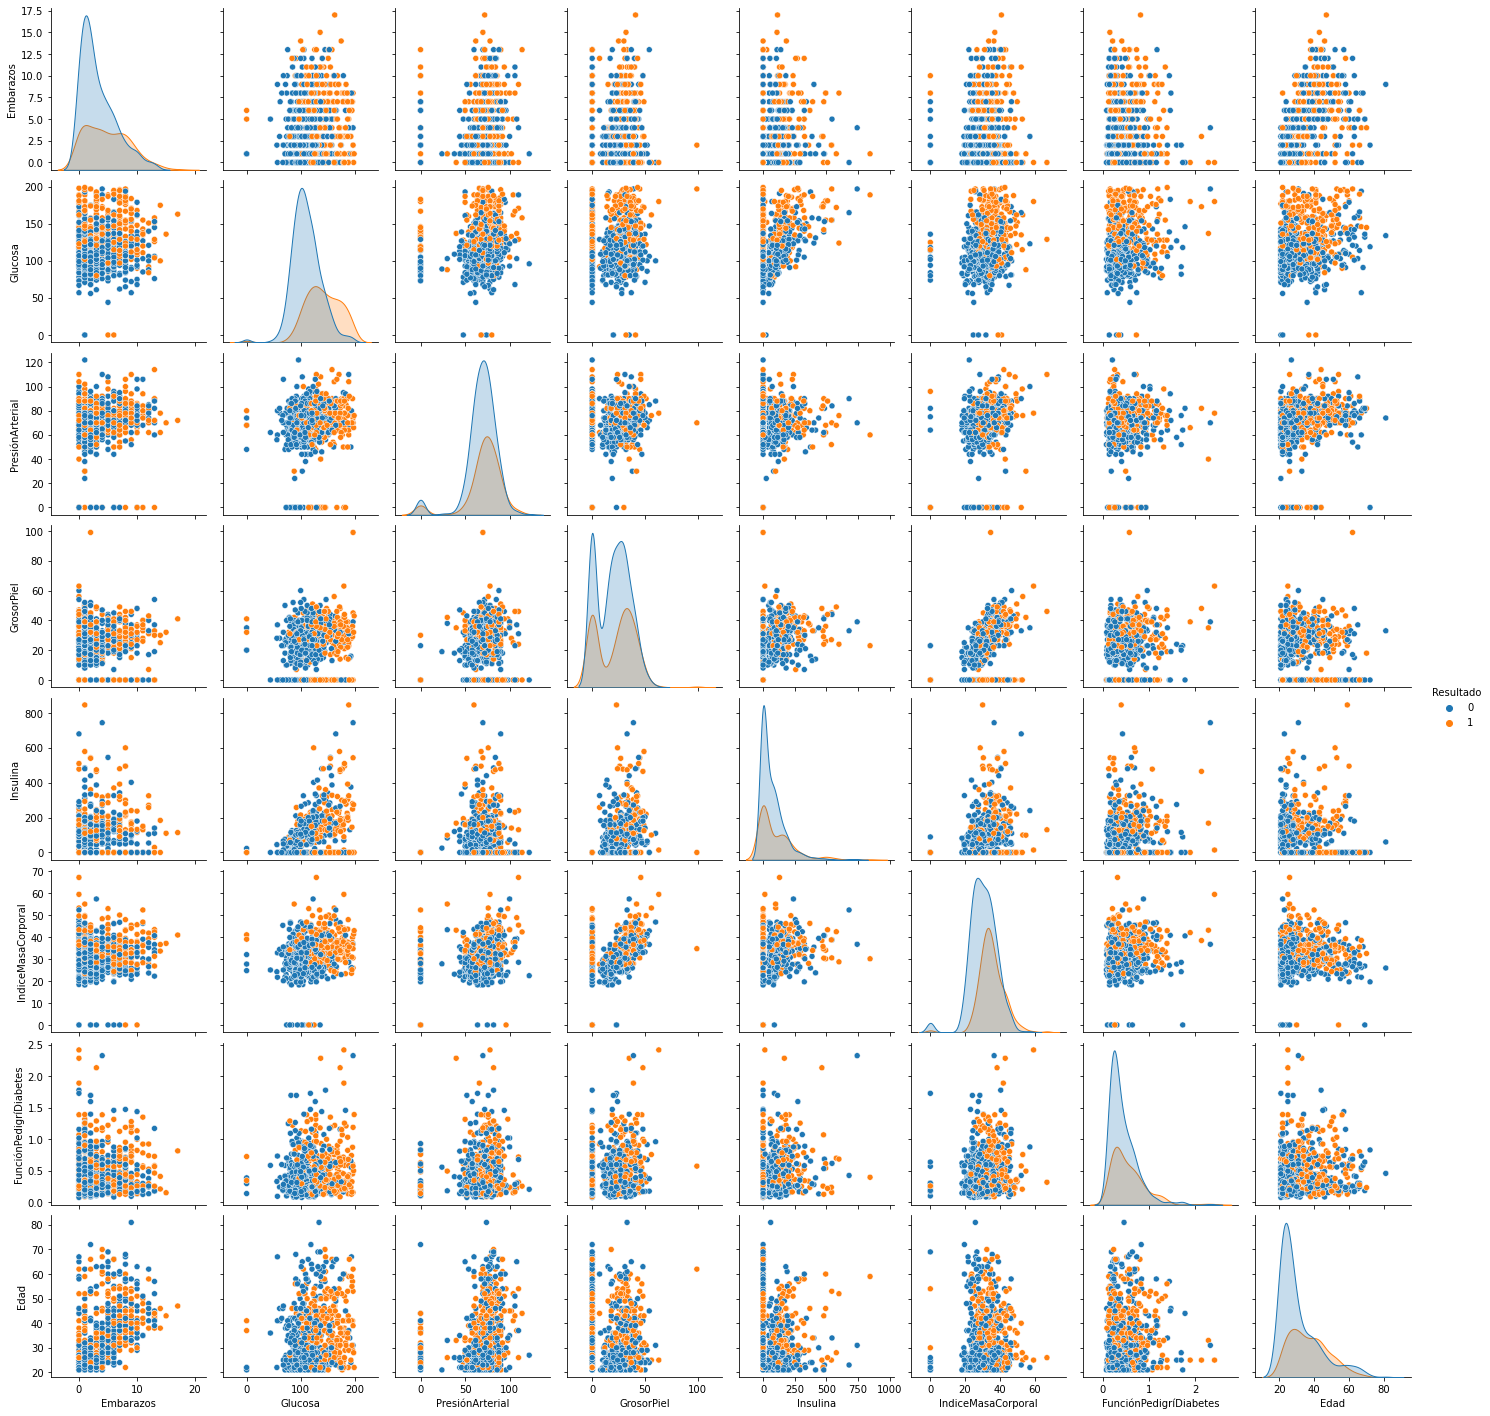

In [14]:
sns.pairplot(df, hue="Resultado")

# Aplicando modelo "Arbol de desiciones"

In [15]:
X=df.drop("Resultado", axis=1) #features
y=df["Resultado"] #clases

In [16]:
#partición del dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
#Se busca escalar los datos, esto se hace debido a que las características son completamente distintas en magnitudes, 
#unidades, por lo que es mejor escalarlos para llevarlos a un mismo nivel de magnitudes.
#
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Profundidad del árbol: 16
Número de nodos terminales: 94


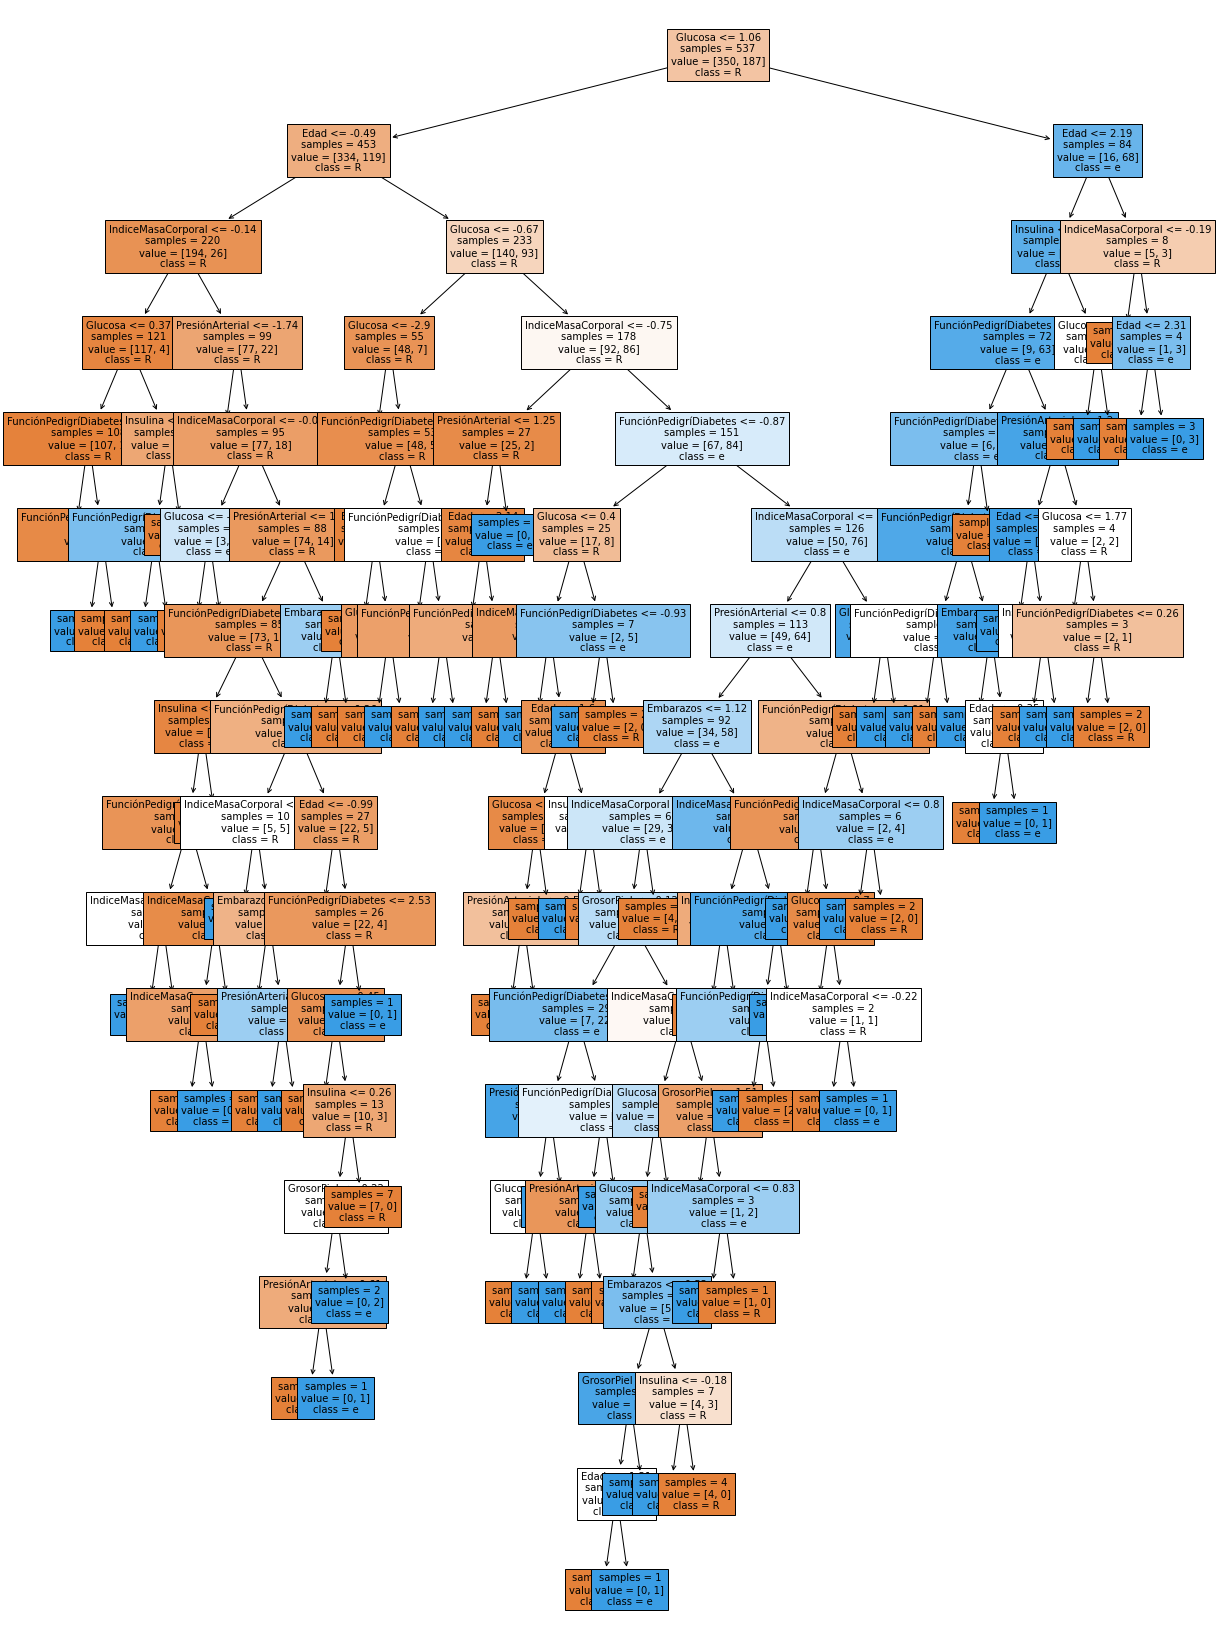

In [18]:
tree = DecisionTreeClassifier(random_state=101)
tree.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(20,30))

print(f"Profundidad del árbol: {tree.get_depth()}")
print(f"Número de nodos terminales: {tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree,
            feature_names = df.drop(columns = "Resultado").columns,
            class_names   = 'Resultado',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [19]:
y_predTree=tree.predict(X_test)
prediccion = tree.predict(X_test)

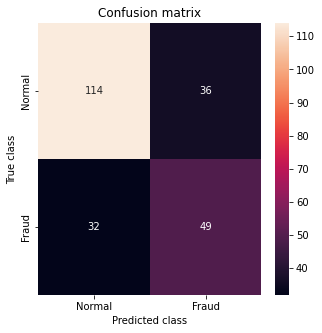

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       150
           1       0.58      0.60      0.59        81

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

El recall de test es: 61.72839506172839 %


In [38]:
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.show()
    print (classification_report(y_test, y_pred))
mostrar_resultados(y_test, y_predTree)
print(f"El recall de test es: {100 * recall_score(y_test, prediccion,)} %")

In [39]:
param_distributions ={"max_depth": range(1,X_train.shape[1]+1,1),
              "max_features": list(range(1,X_train.shape[1]+1,1)),
              "min_samples_leaf": range(1,X_train.shape[1]+1,1),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object
tree_cv =  GridSearchCV(tree, param_distributions,cv = 5,scoring = "recall")
  
tree_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.6577524893314367


In [40]:
resultados = pd.DataFrame(tree_cv.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score,std_test_score
940,entropy,7,6,5,0.657752,0.042306


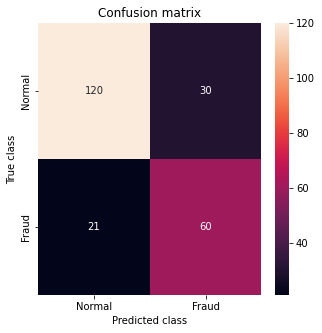

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       150
           1       0.67      0.74      0.70        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.79      0.78      0.78       231

El recall de test es: 74.0 %


In [46]:
modelo_final = tree_cv.best_estimator_
predicciones = modelo_final.predict(X = X_test)
mostrar_resultados(y_test, predicciones)
print(f"El recall de test es: {100 * round(recall_score(y_test, predicciones,),2)} %")

Profundidad del árbol: 7
Número de nodos terminales: 45


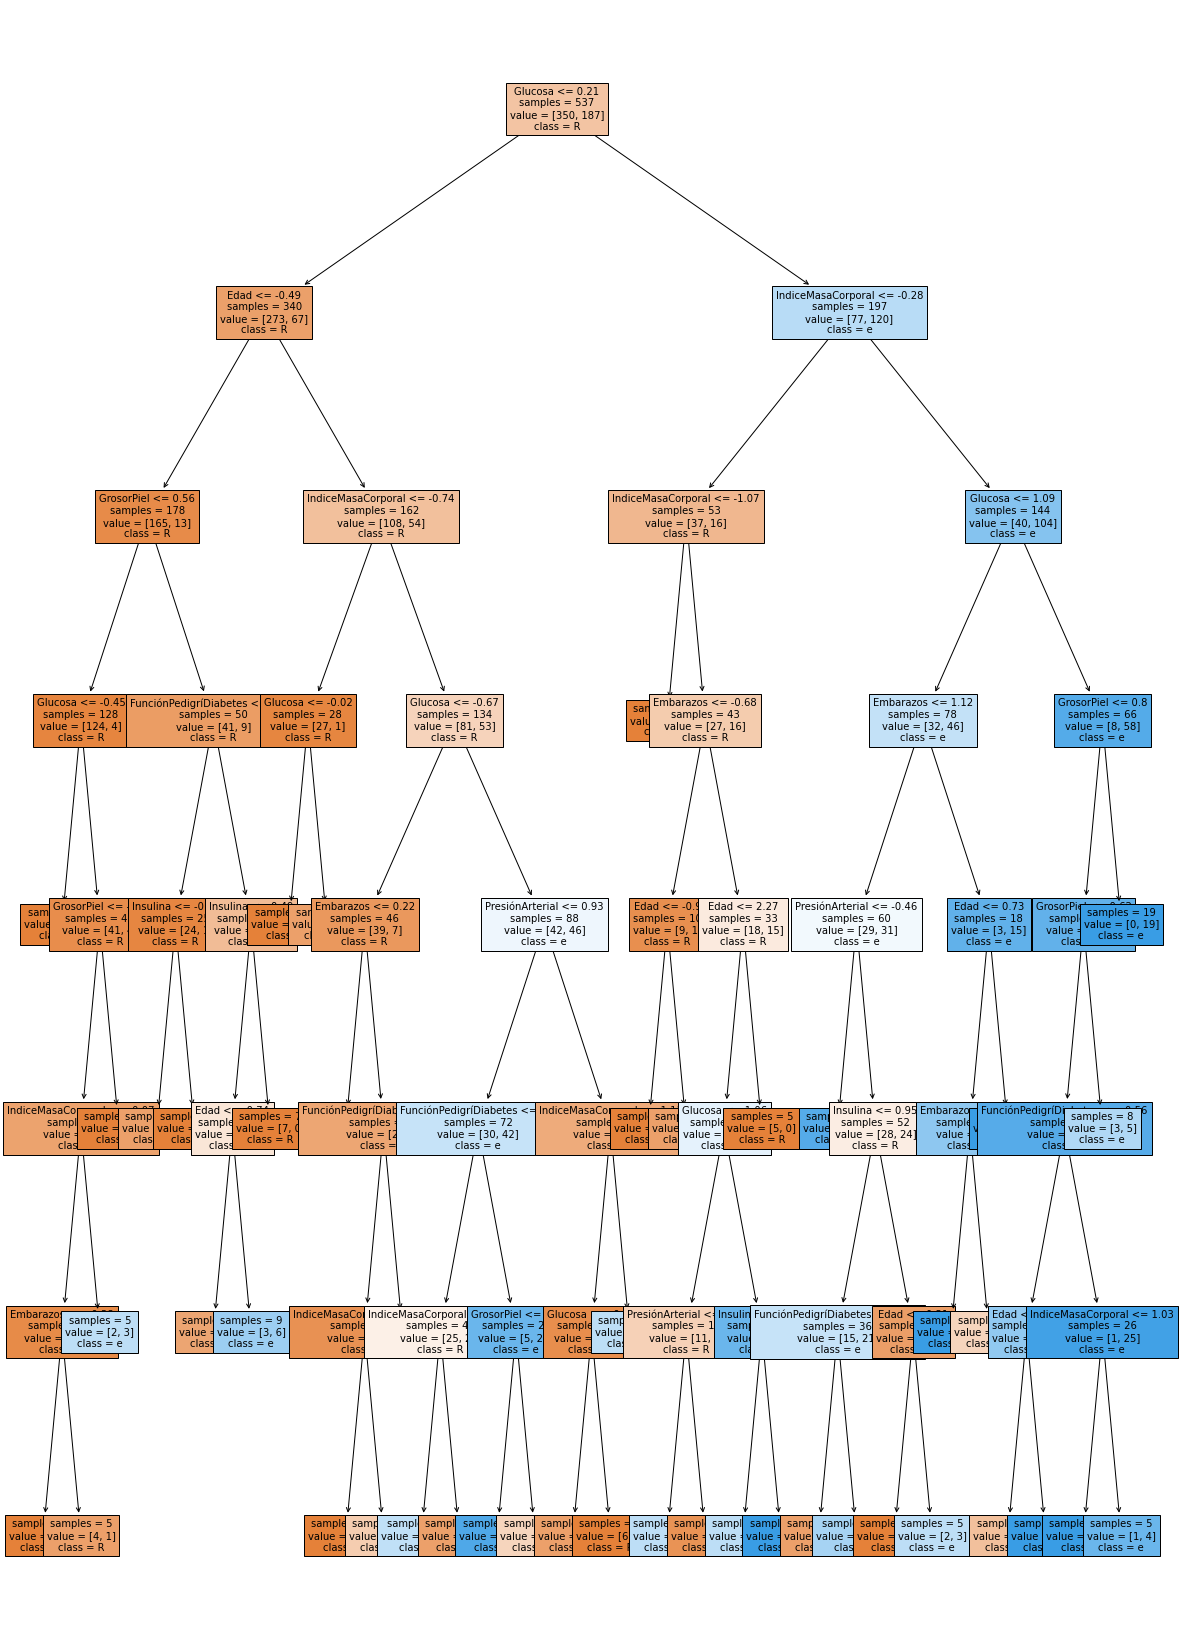

In [42]:
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")
fig, ax = plt.subplots(figsize=(20,30))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Resultado").columns,
            class_names   = 'Resultado',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
)

# Aplicando modelo "Bosque Aleatorio"

In [25]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
y_pred = clf.predict(X_test)
prediccion = clf.predict(X_test) #se usa el modelo entrenado para obtener predicciones con datos nuevos
prediccion

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [27]:
probabilidades_prediccion = clf.predict_proba(X_test) #probabilidades de la regresion
probabilidades_prediccion*100

array([[ 56.,  44.],
       [ 11.,  89.],
       [ 83.,  17.],
       [ 71.,  29.],
       [ 94.,   6.],
       [ 27.,  73.],
       [ 25.,  75.],
       [ 78.,  22.],
       [ 59.,  41.],
       [ 74.,  26.],
       [ 98.,   2.],
       [ 87.,  13.],
       [ 63.,  37.],
       [ 57.,  43.],
       [ 70.,  30.],
       [ 33.,  67.],
       [ 18.,  82.],
       [ 94.,   6.],
       [ 41.,  59.],
       [ 98.,   2.],
       [ 71.,  29.],
       [ 78.,  22.],
       [ 38.,  62.],
       [ 67.,  33.],
       [ 92.,   8.],
       [ 22.,  78.],
       [ 91.,   9.],
       [ 55.,  45.],
       [100.,   0.],
       [ 43.,  57.],
       [ 19.,  81.],
       [ 50.,  50.],
       [ 67.,  33.],
       [ 42.,  58.],
       [ 91.,   9.],
       [ 92.,   8.],
       [ 67.,  33.],
       [ 31.,  69.],
       [ 18.,  82.],
       [ 93.,   7.],
       [ 93.,   7.],
       [ 39.,  61.],
       [ 81.,  19.],
       [ 43.,  57.],
       [ 87.,  13.],
       [ 96.,   4.],
       [ 52.,  48.],
       [ 77.,

# Métricas de evaluación
Quiero que dentro de mi modelo **minimice los falsos negativos**

## Matriz confusion

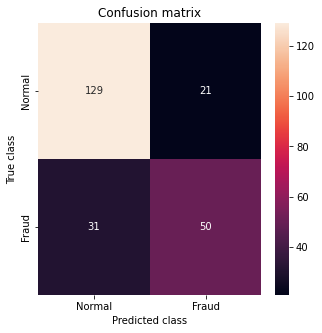

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       150
           1       0.70      0.62      0.66        81

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

El recall de test es: 61.72839506172839 %


In [36]:
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.show()
    print (classification_report(y_test, y_pred))

mostrar_resultados(y_test, y_pred)
print(f"El recall de test es: {100 * recall_score(y_test, y_pred)} %")

**Accuracy:** en este caso, no es recomendable usar accuracy ya que nuestra distribución de las clases no están equilibrados entre los que tienen diabetes y los que no tienen diabetes.

**Recall-metrica elegida:** ya que esta métrica nos permite verificar si nuestro modelo minimiza los falsos negativos, quiere decir en un caso hipotetico: si un usuario tiene diabetes y el modelo de predicción le indica que No tiene, casos así queremos minimizarlos.
Por decirlo de manera simplificada, quiero que mi modelo sea restrictivo

**Precision:** En este caso, precision no nos sirve ya que en este se busca minimizar los falsos positivos: El usuario no tiene diabetes pero el modelo le indica que sí. Esto mas bien nos ayuda a identificar si nuestro modelo es menos restrictivo.

In [43]:
# Grid de hiperparámetros evaluados
# ==============================================================================
min_samples_split = [2,5] # minimum sample number to split a node
min_samples_leaf = [2, 5, 10] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
param_grid = {
                'n_estimators': [10, 30, 50, 70, 90, 110],
                'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                'max_depth' : [4,5,6,7,8],
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = clf,
        param_grid = param_grid,
        cv=5,
        scoring = "recall",       
       )

grid.fit(X_train, y_train)

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bootstrap': False, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10} : 0.637126600284495 recall


In [44]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(3)

,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
1056,False,4,1.0,5,2,10,0.637127,0.119113
1057,False,4,1.0,5,2,30,0.637127,0.119113
1065,False,4,1.0,5,5,70,0.637127,0.119113


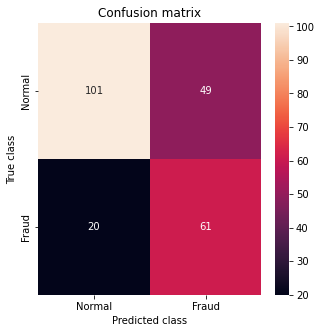

              precision    recall  f1-score   support

           0       0.83      0.67      0.75       150
           1       0.55      0.75      0.64        81

    accuracy                           0.70       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.74      0.70      0.71       231

El recall de test es: 75.0 %


In [47]:
modelo_final = grid.best_estimator_

predicciones = modelo_final.predict(X = X_test)
mostrar_resultados(y_test, predicciones)
print(f"El recall de test es: {100 * round(recall_score(y_test, predicciones,),2)} %")